#Customer Churn Prediction
###Masmur Toloni Harefa
###Dataset : https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-testing-master.csv

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Import Data

In [3]:


from google.colab import drive
drive.mount('/content/drive/')






Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/CustomerChurn/customer_churn_dataset-training-master.csv')

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


#Exploratory Data Analysis

In [7]:
#Look for unique value in every object data
print(df['Gender'].nunique())
print(df['Subscription Type'].nunique())
print(df['Contract Length'].nunique())

2
3
3


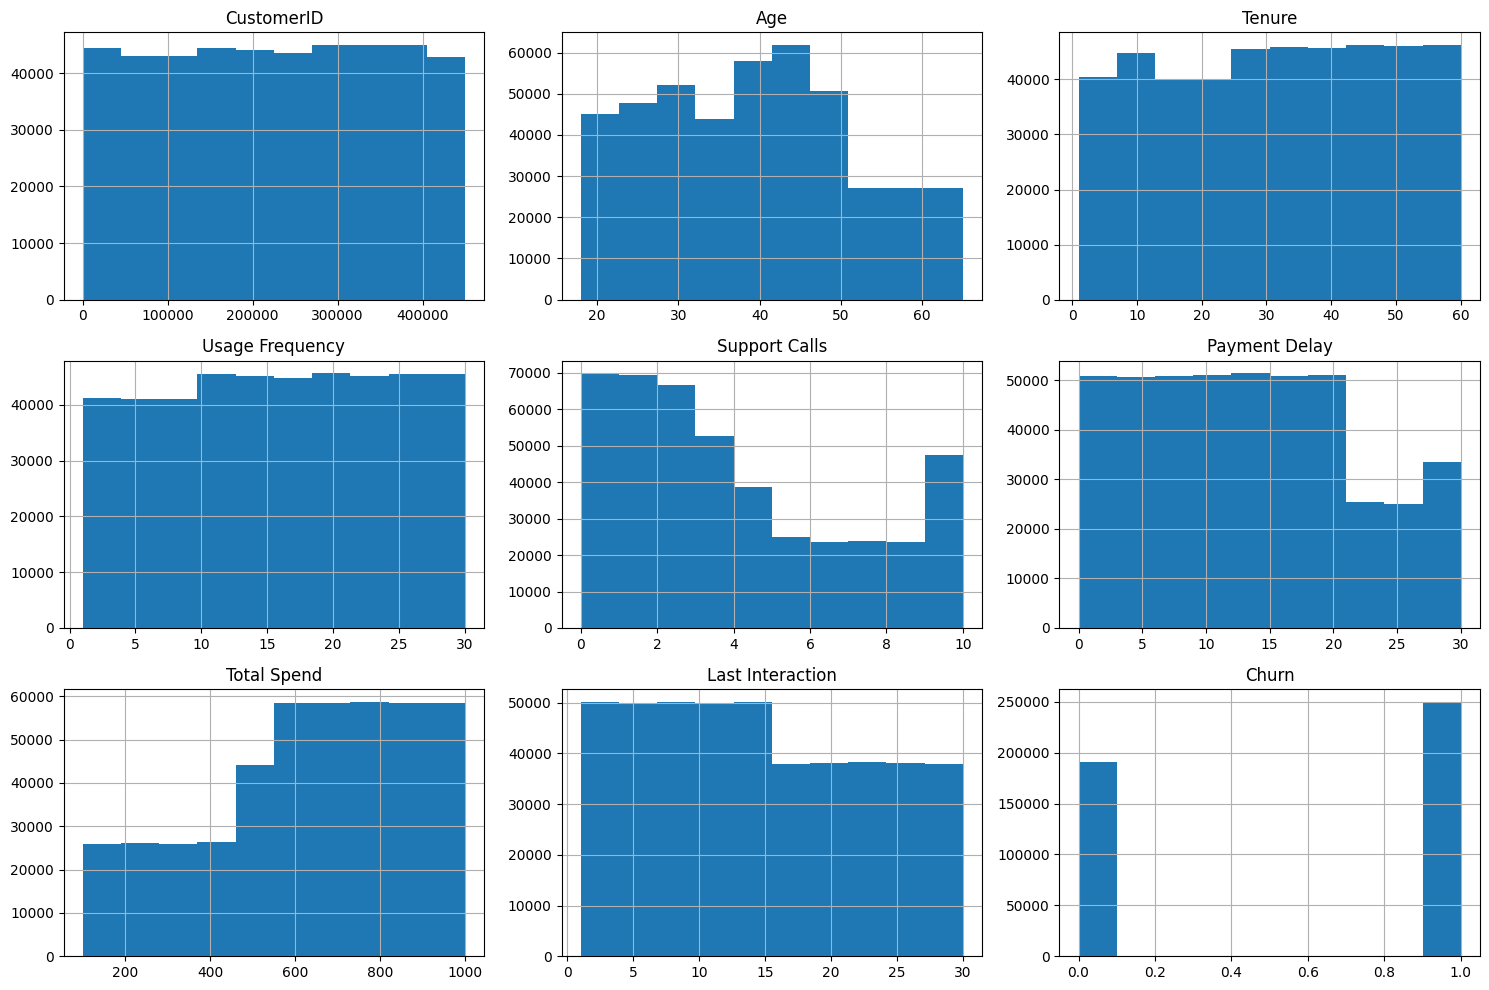

In [8]:
#Plot Every Column

import matplotlib.pyplot as plt
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

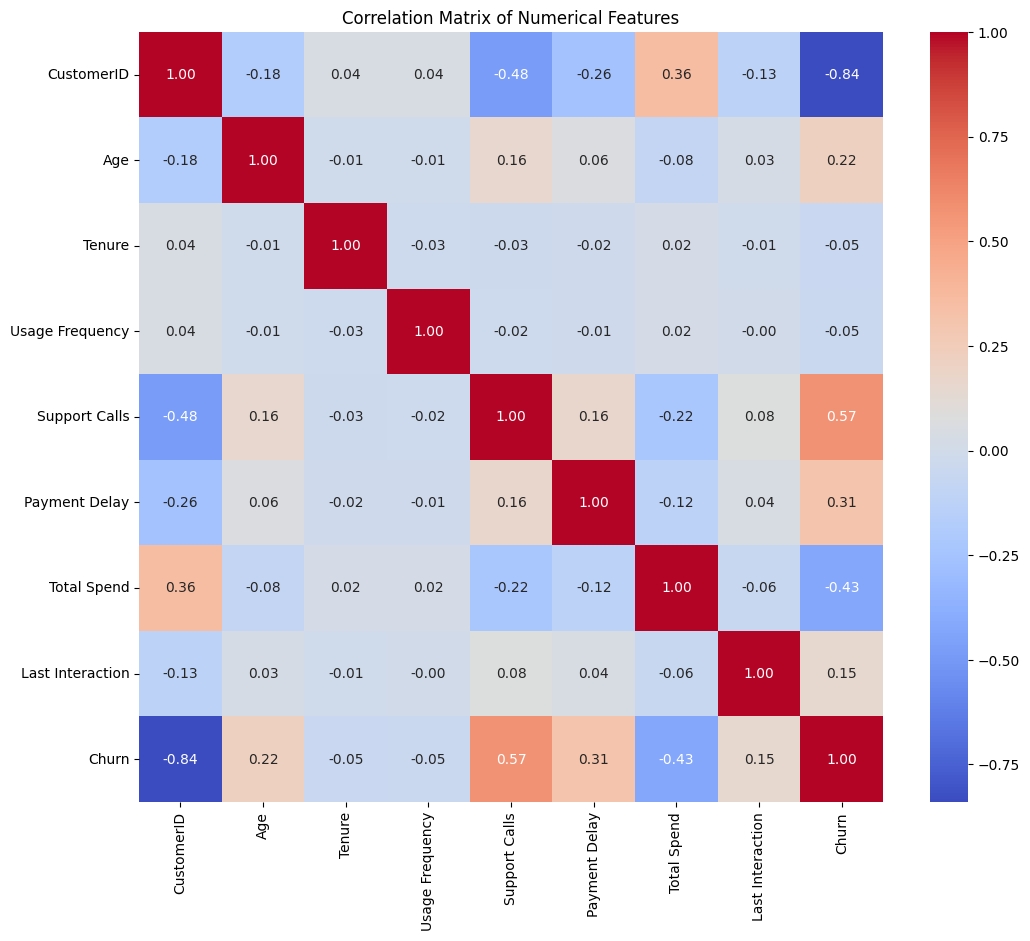

In [9]:
#  plot correlation

import matplotlib.pyplot as plt
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [10]:
#check NaN

df.isna().sum()


,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [11]:
#drop NaN
df= df.dropna()

#Prepocessing

In [12]:
#Encode Object Data in Training
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription Type'] = le.fit_transform(df['Subscription Type'])
df['Contract Length'] = le.fit_transform(df['Contract Length'])
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0
440829,449996.0,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0
440830,449997.0,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0
440831,449998.0,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0


In [13]:
#Separate Feature and Label for training
X = df.drop(['CustomerID','Churn'],axis=1)
y = df['Churn']

In [14]:
#Split Data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(308582, 10)
(132250, 10)


#Modelling

##KNN


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Model
knn = KNeighborsClassifier()

# Grid Parameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV
model_knn = GridSearchCV(estimator=knn,
                         param_grid=param_grid,
                         cv=5,
                         verbose=3,
                         scoring='f1')

# Fit Model
model_knn.fit(X_train, y_train)

# Best Result
print("Best Parameters:", model_knn.best_params_)
print("Best CV Score (F1):", model_knn.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.893 total time=   5.2s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.890 total time=   5.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.892 total time=   5.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.888 total time=   5.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.891 total time=   5.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.893 total time=   2.6s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.890 total time=   2.6s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.892 total time=   2.6s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.888 total time=   2.6s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.891 tot

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_knn = model_knn.predict(X_test)

#print classification report
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

         0.0       0.82      0.99      0.89     57160
         1.0       0.99      0.83      0.90     75090

    accuracy                           0.90    132250
   macro avg       0.90      0.91      0.90    132250
weighted avg       0.92      0.90      0.90    132250



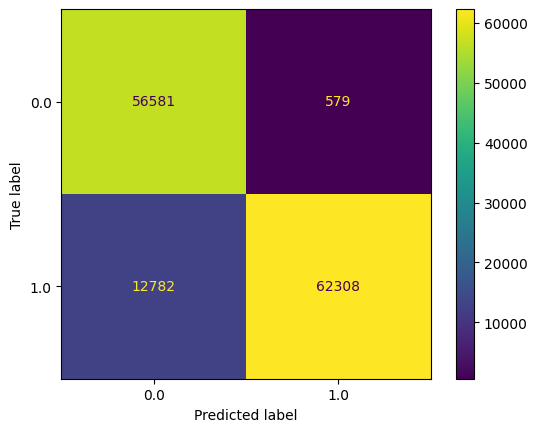

In [17]:

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()

##Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Model
dt = DecisionTreeClassifier(random_state=42)

# Grid Parameter
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
model_dt = GridSearchCV(estimator=dt,
                        param_grid=param_grid,
                        cv=5,
                        verbose=3,
                        scoring='f1')

# Fit Model
model_dt.fit(X_train, y_train)

# Best Result
print("Best Parameters:", model_dt.best_params_)
print("Best CV Score (F1):", model_dt.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.959 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.957 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.960 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.958 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=2;, score=0.960 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=5;, score=0.959 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=5;, score=0.957 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=5;, score=0.960 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=5;, score=0.958 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=5;, score=0.960 total ti

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_dt = model_dt.predict(X_test)

#print classification report
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



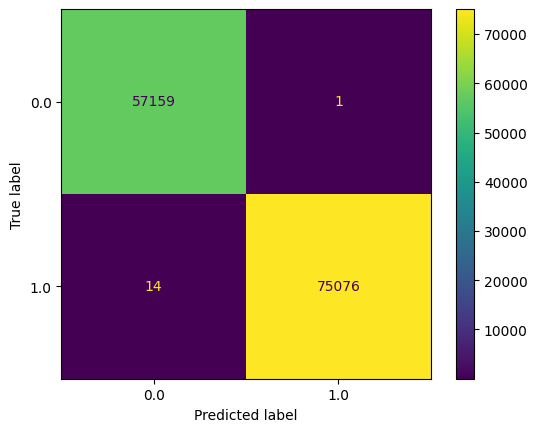

In [20]:

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()
plt.show()

##RandomForest


In [21]:
y_train.value_counts()

,count
Churn,
1.0,174909
0.0,133673


In [22]:
from sklearn.ensemble import RandomForestClassifier


# Model
rf = RandomForestClassifier(random_state=42)

# Grid Parameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# GridSearchHPO
model_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           verbose=3,
                           scoring='f1')

# Fit Model
model_rf.fit(X_train, y_train)


# Best Result
print("Best Parameters:", model_rf.best_params_)
print("Best CV Accuracy:", model_rf.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.999 total time=  15.0s
[CV 2/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.999 total time=  15.2s
[CV 3/3] END max_depth=None, min_samples_split=2, n_estimators=100;, score=1.000 total time=  15.7s
[CV 1/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=1.000 total time=  30.8s
[CV 2/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=0.999 total time=  31.3s
[CV 3/3] END max_depth=None, min_samples_split=2, n_estimators=200;, score=1.000 total time=  31.3s
[CV 1/3] END max_depth=None, min_samples_split=5, n_estimators=100;, score=1.000 total time=  15.1s
[CV 2/3] END max_depth=None, min_samples_split=5, n_estimators=100;, score=0.999 total time=  15.2s
[CV 3/3] END max_depth=None, min_samples_split=5, n_estimators=100;, score=1.000 total time=  15.3s
[CV 1/3] END max_depth=None, min_samples

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred1 = model_rf.predict(X_test)

#print classification report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


#print classification report
print(classification_report(y_test, y_pred1))



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



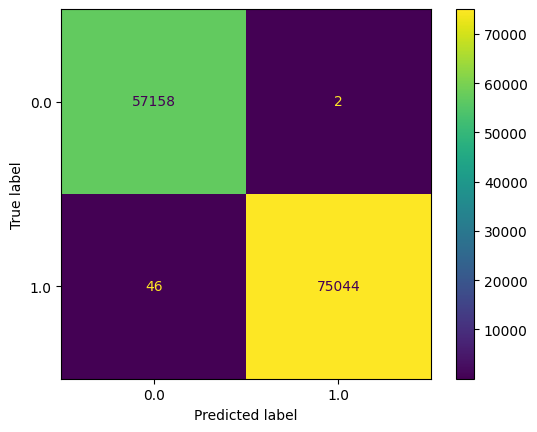

In [25]:


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred1, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot()
plt.show()

##XGBoost

In [26]:
y_train.value_counts()

,count
Churn,
1.0,174909
0.0,133673


In [30]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 2.0 MB/s eta 0:00:00


In [31]:
import xgboost as xgb

#Model
xgb_model = xgb.XGBClassifier( objective='binary:logistic',eval_metric='logloss',random_state=42)

# Grid parameter yang akan dicoba
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}


# Inisialisasi GridSearchCV
model_xgb = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           verbose=3,
                           )

# Jalankan grid search
model_xgb.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", model_xgb.best_params_)
print("Best Score (Accuracy on CV):", model_xgb.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.956 total time=   0.6s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.955 total time=   0.6s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.957 total time=   0.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.955 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.957 total time=   0.8s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.956 total time=   0.5s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.955 total time=   0.6s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=0.957 total time=   0.5s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_es

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model_xgb.predict(X_test)

#print classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



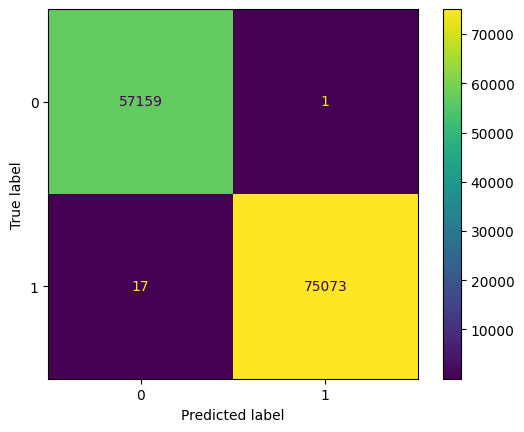

In [33]:
# prompt: plot confusion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot()
plt.show()

##Multilayer Preceptron(MLP)

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_train)
X_test_selected = scaler.transform(X_test)

In [37]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.6 MB/s eta 0:00:00


In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model_mlp = models.Sequential([
    layers.Input(shape=(X_selected.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # output untuk binary classification
])

model_mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

In [52]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_mlp.fit(
    X_selected, y,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
3858/3858 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9739 - auc_2: 0.5056 - loss: 0.1127 - val_accuracy: 0.1097 - val_auc_2: 0.4971 - val_loss: 3.7590
Epoch 2/50
3858/3858 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9843 - auc_2: 0.5007 - loss: 0.0852 - val_accuracy: 0.1097 - val_auc_2: 0.5011 - val_loss: 3.6557
Epoch 3/50
3858/3858 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9854 - auc_2: 0.5021 - loss: 0.0789 - val_accuracy: 0.1097 - val_auc_2: 0.4980 - val_loss: 3.7741
Epoch 4/50
3858/3858 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9853 - auc_2: 0.5055 - loss: 0.0784 - val_accuracy: 0.1097 - val_auc_2: 0.4988 - val_loss: 3.9048
Epoch 5/50
3858/3858 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9853 - auc_2: 0.5090 - loss: 0.0778 - val_accuracy: 0.1097 - val_auc_2: 0.4997 - val_loss: 3.8720
Epoch 6/50
3858/3858 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9856 - auc_2: 0.5155 - loss: 0.0760 - val_accuracy: 0.1097 - val_auc_2: 0.5002 - val_loss: 3.7422
Epo

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred_mlp = model_mlp.predict(X_test)

#print classification report
print(classification_report(y_test, y_pred_mlp))


4133/4133 ━━━━━━━━━━━━━━━━━━━━ 3s 729us/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     57160
         1.0       0.57      1.00      0.72     75090

    accuracy                           0.57    132250
   macro avg       0.28      0.50      0.36    132250
weighted avg       0.32      0.57      0.41    132250



In [54]:
history

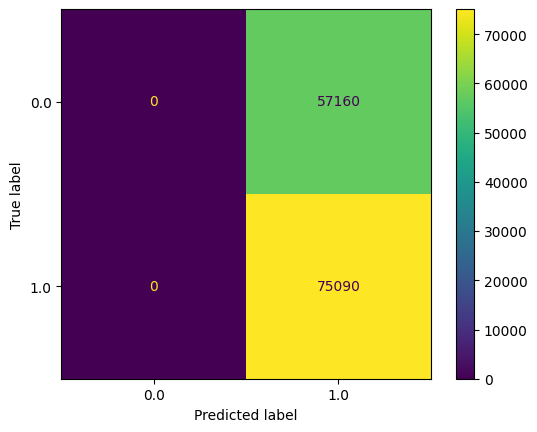

In [55]:
# prompt: plot confusion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_mlp, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()